In [7]:
import numpy as np
from qiskit import Aer
from qiskit.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import COBYLA
from qiskit.opflow import X, Z, I
from qiskit.utils import QuantumInstance
from qiskit.circuit.library import TwoLocal


In [8]:
# 定义 Hamiltonian
H = (0.5 * Z ^ I) + (0.5 * I ^ Z) + (0.5 * Z ^ Z) + (0.5 * X ^ X)

# 使用 NumPy 求解最小特征值（用作基准）
numpy_solver = NumPyMinimumEigensolver()
result = numpy_solver.compute_minimum_eigenvalue(H)
print("NumPy 最小特征值: ", result.eigenvalue.real)

NumPy 最小特征值:  -0.9999999999999988


In [9]:
# 定义量子神经网络（QNN）
qnn = TwoLocal(rotation_blocks="ry", entanglement_blocks="cz", entanglement="linear", reps=3)

# 设置优化器
optimizer = COBYLA(maxiter=500)

# 设置后端
backend = Aer.get_backend("statevector_simulator")
quantum_instance = QuantumInstance(backend, shots=1000)

In [11]:
# 使用 VQE 求解最小特征值
vqe = VQE(ansatz=qnn, optimizer=optimizer, quantum_instance=quantum_instance)
vqe_result = vqe.compute_minimum_eigenvalue(H)
print("VQE 最小特征值: ", vqe_result.eigenvalue.real)

VQE 最小特征值:  -0.9999999802678516


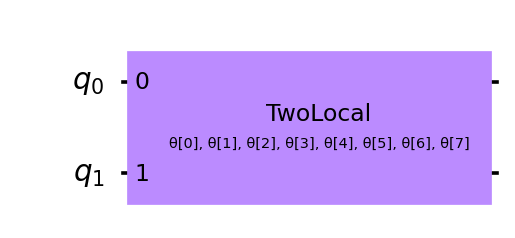

In [12]:
# 绘制量子电路
fig, ax = plt.subplots()
ax.axis('off')
qnn.draw('mpl', scale=0.7, ax=ax)
plt.show()